<a href="https://colab.research.google.com/github/sapinspys/gh-activity-slackbot/blob/master/LSDS_Intro_Assignment_3_Statistics_of_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Forest Fire Statistics

![Forest fire](https://www.publicdomainpictures.net/pictures/220000/velka/forest-fire.jpg)

Forest fires are a sadly timely topic, but data can help us better understand and perhaps manage them in future. In this assignment you'll look at a data set of forest fires in Portugal during 2007 - this is a real research dataset, and you can [read more about it](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) though you do not need to for this assignment.

For our purposes, the main thing that you need to understand are the attributes in the data.

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

Most of these features are numeric - this means we can do things like look at their mean, median, mode, and plot histograms. They have technical sounding names, but generally refer to meteorological data (i.e. the weather).

For the discrete features we can still draw histograms (as in the lecture notebook). X and Y are already integer values - month and day do have natural order, but if you want to use them you may want to translate them from strings to numbers (hint - you can build a dict that maps them, and loop over to apply it).

## Exercise 1 - Load the data and take a peek

The data is accessible as a CSV at the URL: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

You want to load this into a dataframe, so you can then look at the variables and perform descriptive statistics.

After you load it, verify that you've got it working by printing the first five rows of data.

In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Exercise 2 - Explore and summarize the data

Now that you've got the data, take a deeper look at it - the description above gives the overall range (from minimum to maximum), but look at the other core statistics. You should pick three variables you want to look at - two continuous, and one discrete, and for each you should calculate the mean and median.

Don't use the magic built-in functions of pandas or other libraries - write your own functions to calculate mean and median (you can of course refer to the lecture notebooks for help). This is a good exercise both to practice coding and reinforce the statistical concepts.

For each of the three variables you look at, answer the following questions (as comments in your code):

- Is the median larger or smaller than the mean?
- What does that tell you about how the variable is distributed?
- (For the discrete variable only) What is the mode?

Hint - it may help to draw a histogram to look at the variable and really get a feel for it.

Another hint - part of this exercise is making sure you can distinguish between continuous and discrete variables, so take some time to think through your choice of variables.

In [0]:
# Remember, you should write your own code to calculate mean, median, and mode
# If you want, you can doublecheck your answer with pandas methods afterwards
# And if you want to draw a histogram, you should use:
# from matplotlib.pyplot import hist

'''A discrete random variable generally has a countable number of possible values while continuous random variables
  take all values in a given interval. For this assignment I've chosen temperature and Fine Fuel Moisture Code (FFMC) 
  as the continuous variables and Relative Humidity (RH) as the discrete variable. I did take into consideration
  the fact that percentages can be either continuous or discrete and decided it is discrete in this case because 
  the given RH percentages avoid using decimal percentages.'''

from functools import reduce

def meanMedian(numbers):
    numbers.sort()
    mean = round(reduce(lambda x, y: x+y, numbers)/len(numbers),3)
    
    if len(numbers)%2 == 0:
      median = (numbers[(len(numbers)//2)-1] + numbers[((len(numbers)//2)+1)-1])/2  
    else:
      median_index = (len(numbers)+1)//2
      median = numbers[median_index-1]
        
    return {'mean': mean, 'median': median}
  
def mode(numbers):
    counter = {}
    for num in numbers:
      if num in counter:
        counter[num] += 1
      else:
        counter[num] = 1
    
    mode = []
    max_repeated = max(set(counter.values()))
    for key in counter:
      if counter[key] == max_repeated:
        mode.append(key)
        
    return {'mode': mode}

print("Continuous Variable 1: Temperature")
print("--->", meanMedian(df.temp.tolist()))
print("----> The median is almost equal to the mean")
print("----> Temperature distribution is normal \n")

print("Continuous Variable 2: Fine Fuel Moisture Code (FFMC)")
print("--->", meanMedian(df.FFMC.tolist()))
print("----> The median is greater than the mean")
print("----> FFMC distribution is negatively skewed\n")

print("Discrete Variable: Relative Humidity")
meanMedianMode = meanMedian(df.RH.tolist())
mode = mode(df.RH.tolist())
meanMedianMode["mode"] = mode["mode"]
print("--->", meanMedianMode)
print("----> The median is less than the mean")
print("----> RH distribution is positively skewed \n")


Continuous Variable 1: Temperature
---> {'mean': 18.889, 'median': 19.3}
----> The median is almost equal to the mean
----> Temperature distribution is normal 

Continuous Variable 2: Fine Fuel Moisture Code (FFMC)
---> {'mean': 90.645, 'median': 91.6}
----> The median is greater than the mean
----> FFMC distribution is negatively skewed

Discrete Variable: Relative Humidity
---> {'mean': 44.288, 'median': 42, 'mode': [27]}
----> The median is less than the mean
----> RH distribution is positively skewed 



Continuous Variable 1: Temperature
---> Mean: 18.889 C
---> Median: 19.3 C 

Continuous Variable 2: Fine Fuel Moisture Code (FFMC)
---> Mean: 90.645 FFMC
---> Median: 91.6 FFMC 

Discrete Variable: Relative Humidity
---> Mean: 44.288 %
---> Median: 42 %
---> Mode: 27 % 



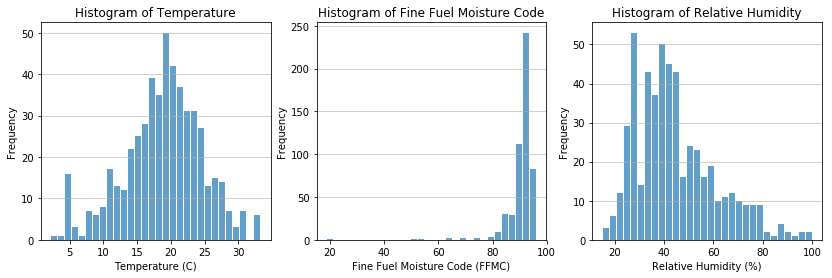

In [0]:
# Cross-checking answer:

import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, median, mode

print("Continuous Variable 1: Temperature")
print("---> Mean:", round(mean(df.temp), 3), "C")
print("---> Median:", round(median(df.temp), 3), "C \n")

print("Continuous Variable 2: Fine Fuel Moisture Code (FFMC)")
print("---> Mean:", round(mean(df.FFMC), 3), "FFMC")
print("---> Median:", round(median(df.FFMC), 3), "FFMC \n")

print("Discrete Variable: Relative Humidity")
print("---> Mean:", round(mean(df.RH), 3), "%")
print("---> Median:", round(median(df.RH), 3), "%")
print("---> Mode:", round(mode(df.RH), 3), "% \n")

num_bins = 30

x = df.temp
y = df.FFMC
z = df.RH

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
ax0, ax1, ax2 = axes.flatten()

ax0.hist(x, bins=num_bins, alpha=0.7, rwidth=0.85)
ax1.hist(y, bins=num_bins, alpha=0.7, rwidth=0.85)
ax2.hist(z, bins=num_bins, alpha=0.7, rwidth=0.85)

ax0.set_xlabel('Temperature (C)')
ax0.set_ylabel('Frequency')
ax0.set_title('Histogram of Temperature')
ax0.grid(axis='y', alpha=0.75)

ax1.set_xlabel('Fine Fuel Moisture Code (FFMC)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Fine Fuel Moisture Code')
ax1.grid(axis='y', alpha=0.75)

ax2.set_xlabel('Relative Humidity (%)')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Relative Humidity')
ax2.grid(axis='y', alpha=0.75)

fig.show()

# NOTE: The FFMC is a numerical rating of the moisture content of litter and other cured fine fuels (needles,
# mosses, twigs less than I cm in diameter). The FFMC is representative of the top litter layer less than
# 1 inch deep (1-2 cm deep), and has a typical fuel loading of about 2.2 tons per acre (5 tonnes per
# hectare) (Groot).

## Exercise 3 - Simulate more data!

There are many more things that could be done with this data, but for now we've not learned about hypothesis testing or inferential statistics. So, one fun thing to do is - make more data!

How do we do that? We can use the same `random` module demonstrated in lecture, and repeatedly sample our data. This is related to the Monte Carlo method used to demonstrate the central limit theorem. In this setting, such simulations could then be applied to Bayesian methods - another topic for another time.

For the same three variables that you looked at in exercise 2, you should do the following:

1. Generate a *new* variable based on taking values at random from the original one - make the new variable have at least 10 times as many observations as the original
2. Calculate the mean, median, and mode of the new variable (it's okay to use prewritten functions for this)
3. Compare your results to what you saw in exercise 2 - it should be very similar

Once you're done, look back at your code. Chances are you learned things as you wrote it, and you can revisit it to clean it up a bit. Maybe put pieces of code you use multiple times in a function, or add some explanatory comments so anyone reading (including "future you") has a clearer understanding of what you did.

In [0]:
# You'll definitely want to import random
# And you may find random.choice particularly helpful

import random

RH = df.RH.tolist()
new_size = len(RH)*10

# sample = random.sample(RH, new_size)
# Using random.sample() returns error: "Sample larger than population or is negative"

results = np.random.choice(RH, new_size)

print("Discrete Variable: Relative Humidity")
print("---> Mean:", round(mean(RH), 3), "%")
print("---> Median:", round(median(RH), 3), "%")
print("---> Mode:", round(mode(RH), 3), "% \n")

print("Discrete Variable: Relative Humidity")
print("---> Mean:", round(mean(results), 3), "%")
print("---> Median:", round(median(results), 3), "%")
print("---> Mode:", round(mode(results), 3), "%")

Discrete Variable: Relative Humidity
---> Mean: 44.288 %
---> Median: 42 %
---> Mode: 27 % 

Discrete Variable: Relative Humidity
---> Mean: 44 %
---> Median: 42.0 %
---> Mode: 27 %


## Exercise 4 (*Optional* "stretch goal") - Simulate a *lot* of data

For *one* of the variables you've been looking at:

1. Make an empty list `variablename_means`
2. Use your code from exercise 3 to run a Monte Carlo simulation of 1000 experiments where you make a new simulated variable (hint - you'll need a loop)
3. For each experiment, calculate the mean of the simulated variable, and append it to the list
4. Plot the list as a histogram

Once you've done the above, answer the question - how does the distribution of the histogram (of the means of a bunch of simulations of real data) look?

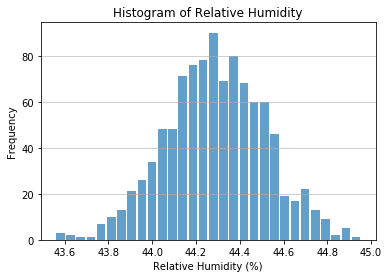

In [0]:
def myMean(numbers):
  return sum(numbers)/len(numbers)

RH_means = []
for experiment in range(1000):
  results = np.random.choice(RH, new_size)
  RH_means.append(myMean(results))

plt.hist(RH_means, bins=30, alpha=0.7, rwidth=0.85)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Relative Humidity')
plt.grid(axis='y', alpha=0.75)
plt.show()

# The experimental dataset is normally distributed